<h1>Project: Build a Facial Recognition System</h1>

<h2>A Note About the Autograder</h2>

<p>This project contains an autograding script that will test your code and provide feedback. The autograder results for this exercise we be collected and factored into your course grade. If you experience difficulty or have questions, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.</p>

<h3>Submit Code to the Autograder</h3>

You can submit your code using the blue <strong>Submit</strong> button above. This button will send your code to the autograder, which will then run several tests over it. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code.

*Note that the autograding process may take a while depending on how long your code takes to run.*

<h3>Evaluation Criteria</h3>

<p>Your code will be autograded for technical correctness and, in some cases, efficency. Please <em>do not</em> change the names of any provided functions or classes within the code, or the autograder may fail to provide accurate feedback..</p>
<p><strong>You must complete this assignment to complete the course.</strong></p>
<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>
<hr />

<h2>Import Libraries</h2>

Before you get started, you need to import a few libraries. You can do this by executing the following code. Remember, run code in a cell by selecting the cell, holding the shift key, and pressing enter/return.

In [1]:
import numpy as np
from scipy.stats import mode
from helper_functions import l2distance
import sys
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
from helper_functions import loaddata, visualize_knn_2D, visualize_knn_images, plotfaces, visualize_knn_boundary


print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.6


<h2>k-Nearest Neighbors Implementation in Python</h2>

<p>The goal of implementing your $k$-NN classifier is to build a classifier for face recognition. We have obtained some data, images of faces, for testing your code. The data resides in the file <code>faces.mat</code>, which holds the dataset for our exercises below.</p>

We will refer to the training vectors as <b>xTr</b> with labels <b>yTr</b>. Our testing vectors are <b>xTe</b> with labels <b>yTe</b>.
As a reminder, to predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h3> Visualizing the Data</h3>

Let us take a look at the data. The following script will take the first ten training images from the face dataset and visualize them. Run the code cell to see the visualized data.

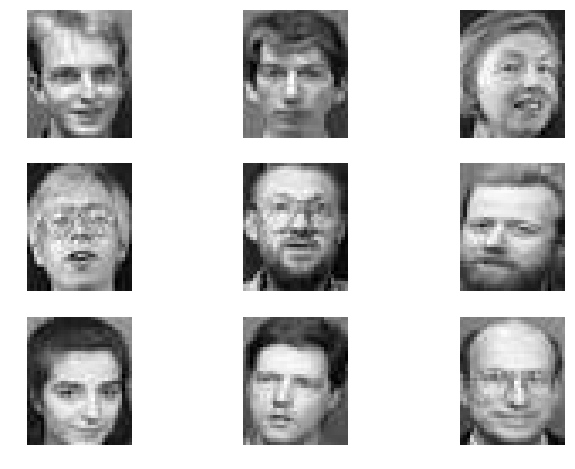

In [2]:
xTr,yTr,xTe,yTe=loaddata("faces.mat")

plt.figure(figsize=(11,8))
plotfaces(xTr[:9, :])


<h3>Implement k-NN for Facial Recognition</h3>
<p>The following four sections will step you through implementing each function necessary to build your facial recognition system.<br></p>

<h4>1: Implement <b><code>findknn</code></b></h4>

<p>Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set. The call of 
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
should result in two matrices $I$ and $D$, both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$. 
So, for example, if we set <code>i=I(1,3)</code>, then <code>xTr(i,:)</code> is the first nearest neighbor of vector <code>xTe(3,:)</code>. The second matrix $D$ returns the corresponding distances. So $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.
</p>

In [3]:
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """

    ### BEGIN SOLUTION
    D = l2distance(xTr, xTe)
    indices = np.argsort(D, axis=0)
    dists = np.sort(D, axis=0)
    return indices[:k,:], dists[:k,:]
    ### END SOLUTION

In [4]:
### BEGIN HIDDEN TESTS
def findknn_grader(xTr,xTe,k):
    D = l2distance(xTr, xTe)
    indices = np.argsort(D, axis=0)
    dists = np.sort(D, axis=0)
    return indices[:k,:], dists[:k,:]

xTr = np.random.rand(500,100)
xTe = np.random.rand(100,100)
Ig,Dg = findknn_grader(xTr,xTe,1)
Is,Ds = findknn(xTr,xTe,1)
test = np.linalg.norm(Ig - Is) + np.linalg.norm(Dg - Ds)
assert test<1e-5
### END HIDDEN TESTS

In [5]:
### BEGIN HIDDEN TESTS
xTr = np.random.rand(500,100)
xTe = np.random.rand(100,100)
Ig,Dg = findknn_grader(xTr,xTe,3)
Is,Ds = findknn(xTr,xTe,3)
test = np.linalg.norm(Ig - Is) + np.linalg.norm(Dg - Ds)
assert test<1e-5
### END HIDDEN TESTS

<p> The following demo samples random points in 2D. If your <code>findknn</code> function is correctly implemented, you should be able to click anywhere on the plot to add a test point. The function should then draw direct connections from your test point to the k  nearest neighbors. Verify manually if your code is correct.
</p>

<IPython.core.display.Javascript object>


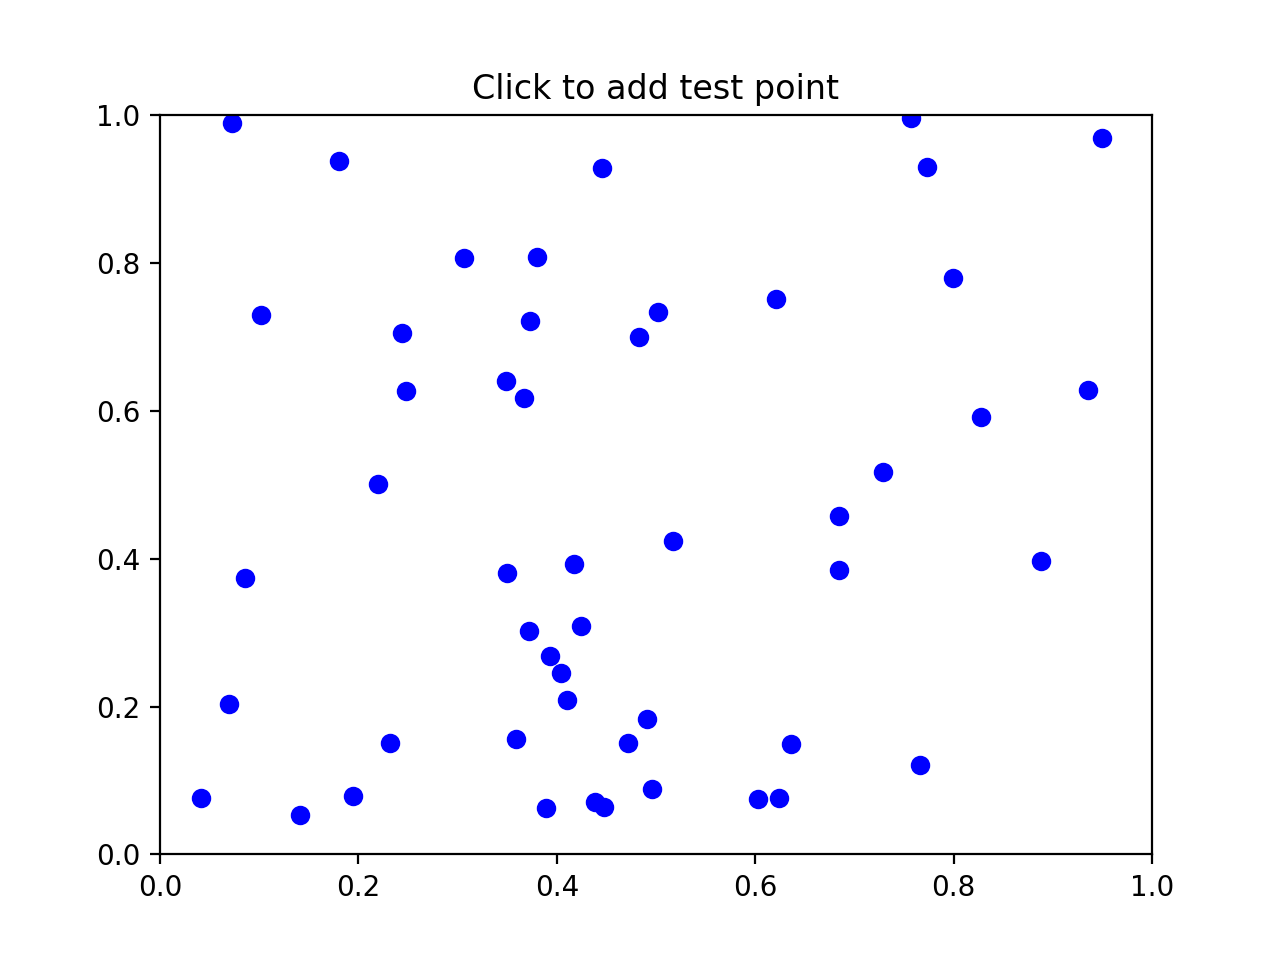

In [21]:
%matplotlib notebook
visualize_knn_2D(findknn)

We can visualize the k=3 nearest training neighbors of some of the test points (Click on the image to cycle through different test points).

<IPython.core.display.Javascript object>


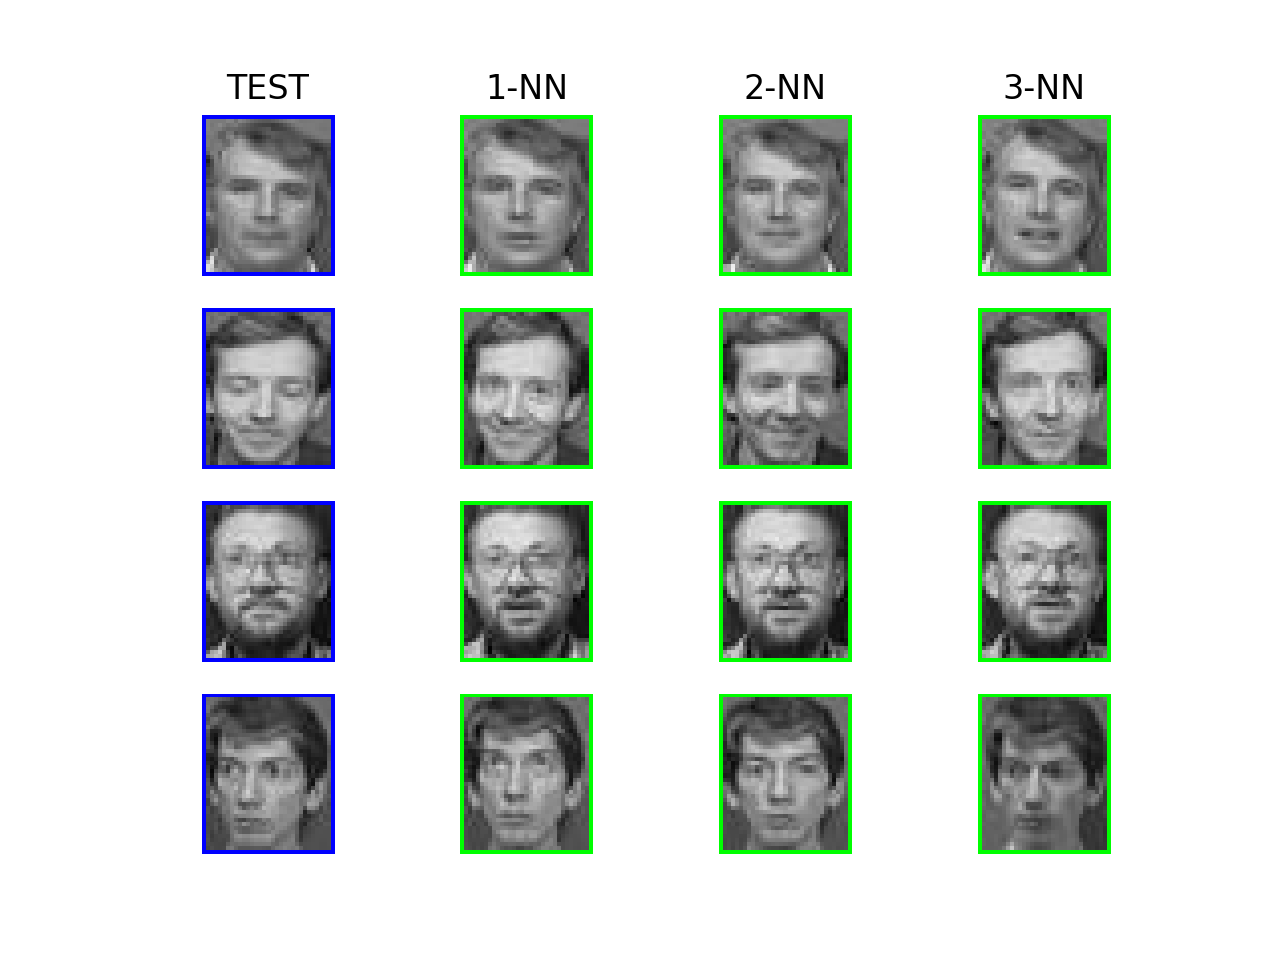

Click on the images above, to cycle through the test images.


/Users/cave/miniconda3/envs/py37/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [22]:
%matplotlib notebook
visualize_knn_images(findknn, imageType='faces')

<h4>2: Implement <b><code>analyze</code></b></h4>

<p>The function <b><code>analyze</code></b> should compute various metrics to evaluate a classifier. The call of
<pre>
  result=analyze(kind,truth,preds);
</pre>
should output the <b>accuracy</b> or <b>absolute loss</b> in variable <code>result</code>. The type of output required can be specified in the input argument <code>kind</code> as <code>"abs"</code> or <code>"acc"</code>. The input variables <code>truth</code> and <code>pred</code> should contain vectors of true and predicted labels respectively.
For example, the call
<pre>
>> analyze('acc',[1 2 1 2],[1 2 1 1])
</pre>
should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 75% accuracy.
</p>



In [23]:
def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind='acc' classification error
    kind='abs' absolute loss
    (other values of 'kind' will follow later)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()

    ### BEGIN SOLUTION
    truth = truth.flatten()
    preds = preds.flatten()
    if len(truth) == 0 and len(preds) == 0:
        output = 0
        return output
    if kind == 'abs':
        # compute the absolute difference between truth and predictions
        output = np.sum(np.abs(truth - preds)) / float(len(truth))
    elif kind == 'acc':
        output = np.sum(truth == preds) / float(len(truth))
    return output
    ### END SOLUTION

In [24]:
### START HIDDEN TESTS
truth = np.array([1, 2, 3, 4])
preds = np.array([1, 2, 3, 0])
assert abs(analyze('acc',truth,preds) - 0.75)<1e-10
### END HIDDEN TESTS

In [25]:
### START HIDDEN TESTS
truth = np.array([0.5, 1, 3, 4])
preds = np.array([1, 2, 3, 0])
assert abs(analyze('abs',truth,preds) - 1.375)<1e-10
### END HIDDEN TESTS

<h4>3: Implement <b><code>knnclassifier</code></b></h4>

<p>Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set. The call <pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
should output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>

In [26]:
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    # fix array shapes
    yTr = yTr.flatten()

    ### BEGIN SOLUTION
    # fix array shapes
    yTr = yTr.flatten()
    inds, _ = findknn_grader(xTr, xTe, k)
    m, d = xTe.shape
    vs = yTr[inds]
    preds = np.array([mode(vs[:,i])[0] for i in range(m)]).flatten()
    return preds
    ### END SOLUTION

In [27]:
## START HIDDEN TESTS
X = np.array([[1,0,0,1],[0,1,0,1]]).T
y = np.array([1,1,2,2])
np.testing.assert_allclose(knnclassifier(X,y,X,1),y)
## END HIDDEN TESTS

In [28]:
## START HIDDEN TESTS
X = np.array([[1,0,0,1],[0,1,0,1]]).T
y = np.array([1,1,2,2])
y2 = np.array([2,2,1,1])
assert np.array_equal(knnclassifier(X,y,X,3),y2)
## END HIDDEN TESTS

In [29]:
## START HIDDEN TESTS
X = np.array([[-4,-3,-2,2,3,4]]).T
y = np.array([1,1,1,2,2,2])
X2 = np.array([[-1,1]]).T
y2 = np.array([1,2])
assert np.array_equal(knnclassifier(X,y,X2,2),y2)
## END HIDDEN TESTS

In [30]:
## START HIDDEN TESTS
X = np.array([[-4,-3,-2,2,3,4]]).T
y = np.array([1,1,1,2,2,2])
X2 = np.array([[0,1]]).T
y2 = np.array([1,2])
y3 = np.array([2,2])
assert np.array_equal(knnclassifier(X,y,X2,2),y2) or np.array_equal(knnclassifier(X,y,X2,2),y3)
## END HIDDEN TESTS

In [31]:
## START HIDDEN TESTS
X = np.random.rand(4,4)
y = np.array([1,2,2,2])
assert analyze('acc',knnclassifier(X,y,X,1),y) == 1
## END HIDDEN TESTS

In [32]:
## START HIDDEN TESTS
X = np.random.rand(4,4)
y = np.array([1,2,1,2])
assert analyze('abs',knnclassifier(X,y,X,1),y) == 0
## END HIDDEN TESTS

In [33]:
## START HIDDEN TESTS
X = np.random.rand(10,100)
y = np.round(np.random.rand(10)).astype('int')
assert analyze('acc',knnclassifier(X,y,X,1),y) == 1
## END HIDDEN TESTS

<p>You can compute the actual classification error on the test set by calling
<pre>
>> analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))
</pre></p>

<h4>4: Calculate Accuracy</b></h4>

<p>The following script runs your $k$-nearest neighbor classifier over the faces and digits data set. The faces data set has $40$ classes and the digits data set has $10$. What classification accuracy would you expect from a random classifier?</p>

In [34]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0165 seconds



<h3>KNN Boundary Visualization</h3>

To help give you a visual understanding of how the k-NN boundary is affected by $k$ and the specific dataset, feel free to play around with the visualization below. Click anywhere in the graph to add a negative class point. Hold down 'p' and click anywhere to add a positive class point. To increase $k$ hold down 'h' and click anywhere.

<IPython.core.display.Javascript object>


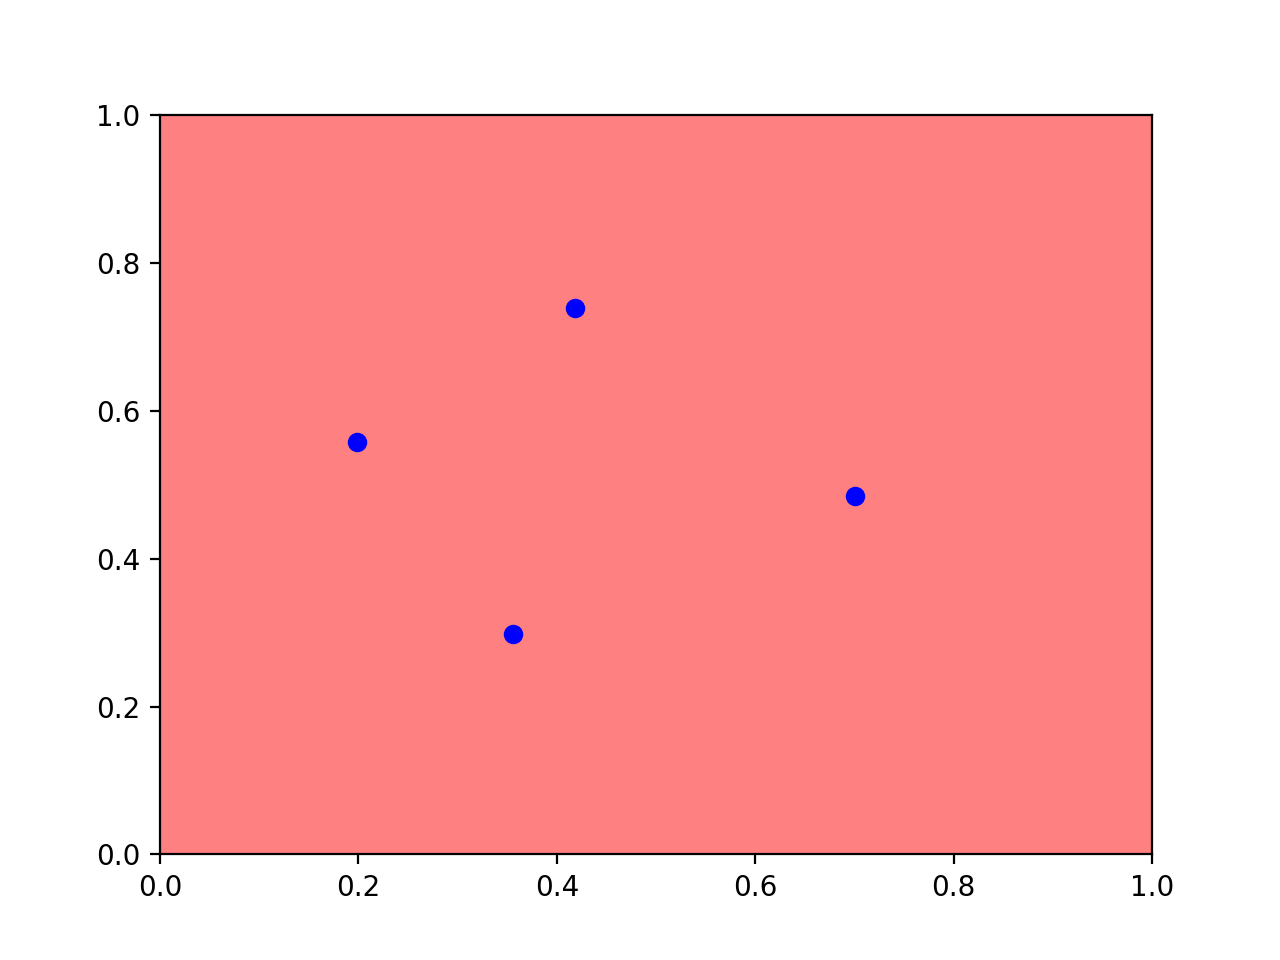

In [35]:
%matplotlib notebook
visualize_knn_boundary(knnclassifier)